In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def RMS_from_xvg(path, skip_beg=18, skip_end=1):
    with open(path, "r") as myFile:
        data = [[float(i) for i in line.strip().split('    ')] for line in myFile.read().split('\n')[skip_beg:(skip_end * (-1))]]
    return [x[1] for x in data]

In [3]:
def plot_xvg(path, label, data_size, skip_beg=18, skip_end=1):
    def RMS_from_xvg(path, skip_beg, skip_end):
        with open(path, "r") as myFile:
            data = [[float(i) for i in line.strip().split('    ')] for line in myFile.read().split('\n')[skip_beg:(skip_end * (-1))]]
        return [x[0] for x in data], [x[1] for x in data]
    x, y = RMS_from_xvg(path, skip_beg, skip_end)
    plt.plot(x[:data_size], y[:data_size], label=label)

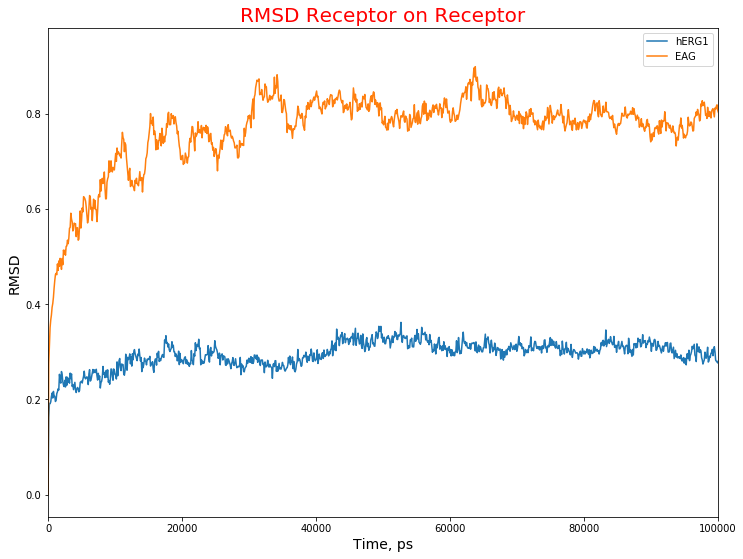

In [22]:
fig = plt.figure(figsize=(12,9))

plot_xvg("/home/nikita/D/Potassium channels/for_all/hERG1/pictures/RMSD_rec_rel_rec.xvg", label="hERG1", data_size=5001)
plot_xvg("/home/nikita/D/Potassium channels/for_all/EAG/pictures/RMSD_rec_rel_rec.xvg", label="EAG", data_size=5001)



plt.xlim(0, 100000)

plt.legend()
plt.xlabel("Time, ps", fontsize=14)
plt.ylabel("RMSD", fontsize=14)
plt.title("RMSD Receptor on Receptor", color='red', fontsize=20)


plt.show()

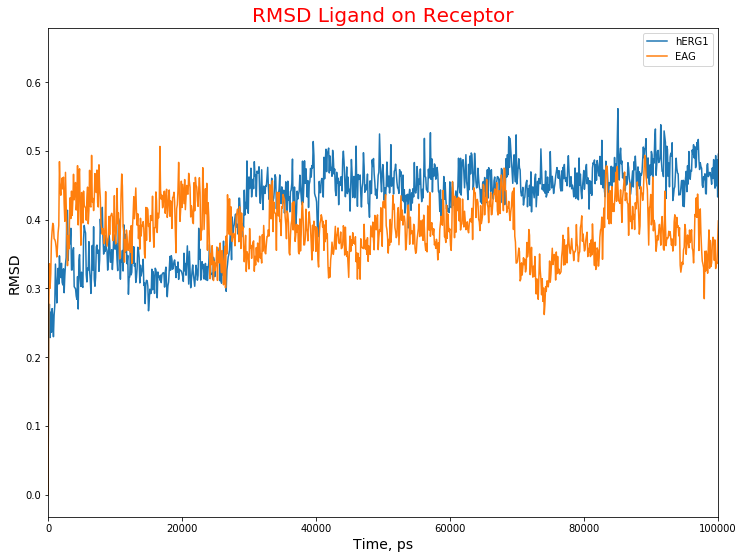

In [24]:
fig = plt.figure(figsize=(12,9))

plot_xvg("/home/nikita/D/Potassium channels/for_all/hERG1/pictures/RMSD_tox_rel_rec.xvg", label="hERG1", data_size=5001)
plot_xvg("/home/nikita/D/Potassium channels/for_all/EAG/pictures/RMSD_tox_rel_rec.xvg", label="EAG", data_size=5001)



plt.xlim(0, 100000)

plt.legend()
plt.xlabel("Time, ps", fontsize=14)
plt.ylabel("RMSD", fontsize=14)
plt.title("RMSD Ligand on Receptor", color='red', fontsize=20)


plt.show()

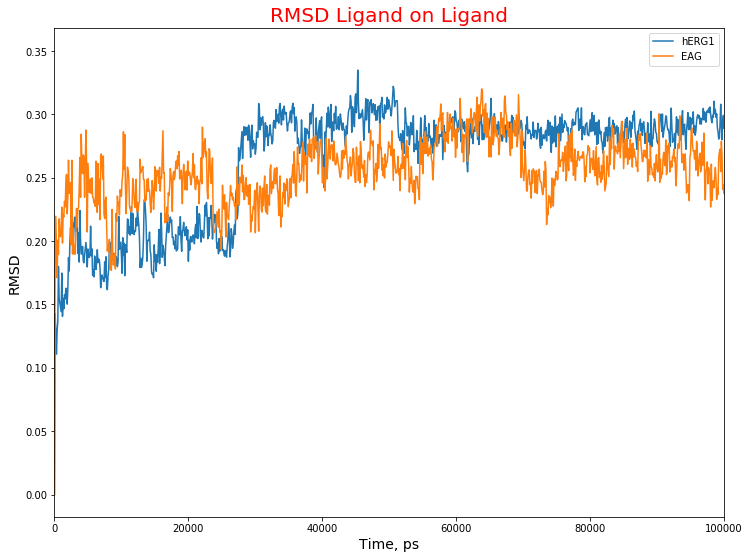

In [16]:
fig = plt.figure(figsize=(12,9))

plot_xvg("/home/nikita/D/Potassium channels/for_all/hERG1/pictures/RMSD_tox_rel_tox.xvg", label="hERG1", data_size=5001)
plot_xvg("/home/nikita/D/Potassium channels/for_all/EAG/pictures/RMSD_tox_rel_tox.xvg", label="EAG", data_size=5001)



plt.xlim(0, 100000)

plt.legend()
plt.xlabel("Time, ps", fontsize=14)
plt.ylabel("RMSD", fontsize=14)
plt.title("RMSD Ligand on Ligand", color='red', fontsize=20)

plt.show()

In [5]:
def xvg_data(path, return_x = False, skip_beg=17, skip_end=1):
    def RMS_from_xvg(path, skip_beg, skip_end):
        with open(path, "r") as myFile:
            data = [[float(i) for i in line.strip().split('   ')] for line in myFile.read().split('\n')[skip_beg:(skip_end * (-1))]]
        return [x[0] for x in data], [x[1] for x in data]
    x, y = RMS_from_xvg(path, skip_beg, skip_end)
    if (return_x):
        return list(map(int, x)), y
    else:
        return y

In [6]:
BeKm_1= ['ARG1','PRO2','THR3','ASP4','ILE5','LYS6','CYS7','SER8','GLU9','SER10','TYR11','GLN12','CYS13','PHE14','PRO15','VAL16','CYS17','LYS18','SER19','ARG20','PHE21','GLY22','LYS23','THR24','ASN25','GLY26','ARG27','CYS28','VAL29','ASN30','GLY31','PHE32','CYS33','ASP34','CYS35','PHE36']

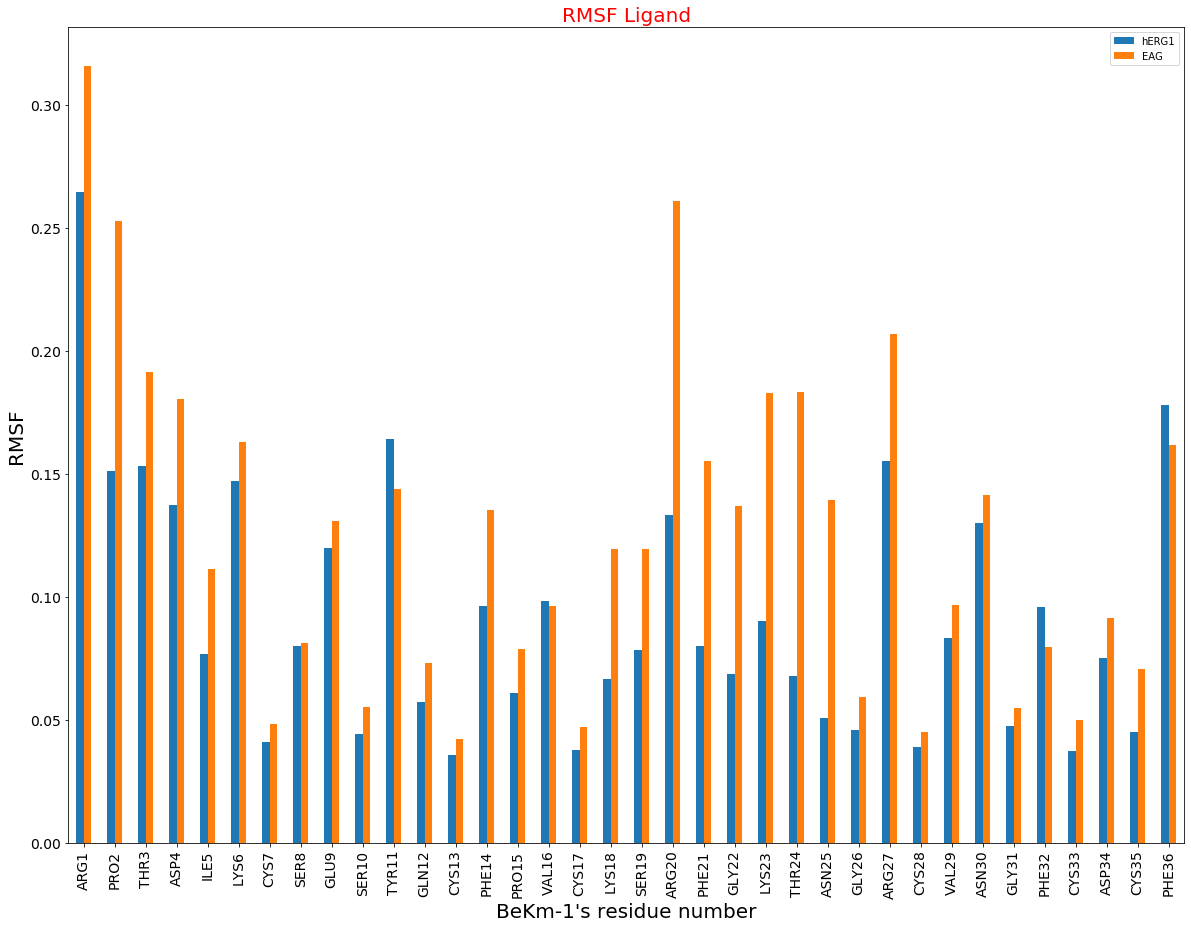

In [14]:
plotdata = pd.DataFrame({
    "hERG1":xvg_data("/home/nikita/D/Potassium channels/for_all/hERG1/pictures/RMSF_tox.xvg"),
    "EAG":xvg_data("/home/nikita/D/Potassium channels/for_all/EAG/pictures/RMSF_tox.xvg")
    }, 
    index=BeKm_1
)


plotdata.plot(kind="bar", figsize=(20,15), fontsize=14)
plt.title("RMSF Ligand", fontsize=20, color='red')
plt.xlabel("BeKm-1's residue number", fontsize=20)
plt.ylabel("RMSF", fontsize=20)
plt.savefig("RMSF_lig.png")

plt.show()

In [18]:
def data_for_average(label):
    residues, d1 = xvg_data("/home/nikita/D/Potassium channels/for_all/" + label + "/pictures/RMSF_rec_1.xvg", return_x=True)
    d1 = np.array(d1)
    d2 = np.array(xvg_data("/home/nikita/D/Potassium channels/for_all/" + label + "/pictures/RMSF_rec_2.xvg"))
    d3 = np.array(xvg_data("/home/nikita/D/Potassium channels/for_all/" + label + "/pictures/RMSF_rec_3.xvg"))
    d4 = np.array(xvg_data("/home/nikita/D/Potassium channels/for_all/" + label + "/pictures/RMSF_rec_4.xvg"))
    
    
    d_aver = (d1 + d2 + d3 + d4) / 4
    d_std = np.std([d1, d2, d3, d4], axis=0)
    return d_aver, d_std, residues

def plot_receptor_RMSF(label):
    fig = plt.figure(figsize=(12,9))

    d_aver, d_std, residues = data_for_average(label)

    if(label == "hERG1"):
        residues = [i - 1000 for i in residues]
    
    plotdata = pd.DataFrame({
        label:d_aver
        }, 
        index=residues
    )
    ploterror = pd.DataFrame({
        label:d_std
        }, 
        index=residues
    )

    plotdata.plot(kind="bar", figsize=(20,15), yerr=ploterror)
    plt.title("RMSF " + label + " average in BeKm-1 sight", fontsize=20, color='red')
    plt.xlabel("Receptor residues", fontsize=14)
    plt.ylabel("RMSD", fontsize=14)
    #plt.savefig(f"RMSF_{label}.png")

    plt.show()
   

###### Основные элементы строения сайта связывания hERG1
    573-611: S5-P Linker
        577-583: S5-P1
        585-594: S5-P2
    612-630: P Loop
    631-636: S6-P Linker

<Figure size 864x648 with 0 Axes>

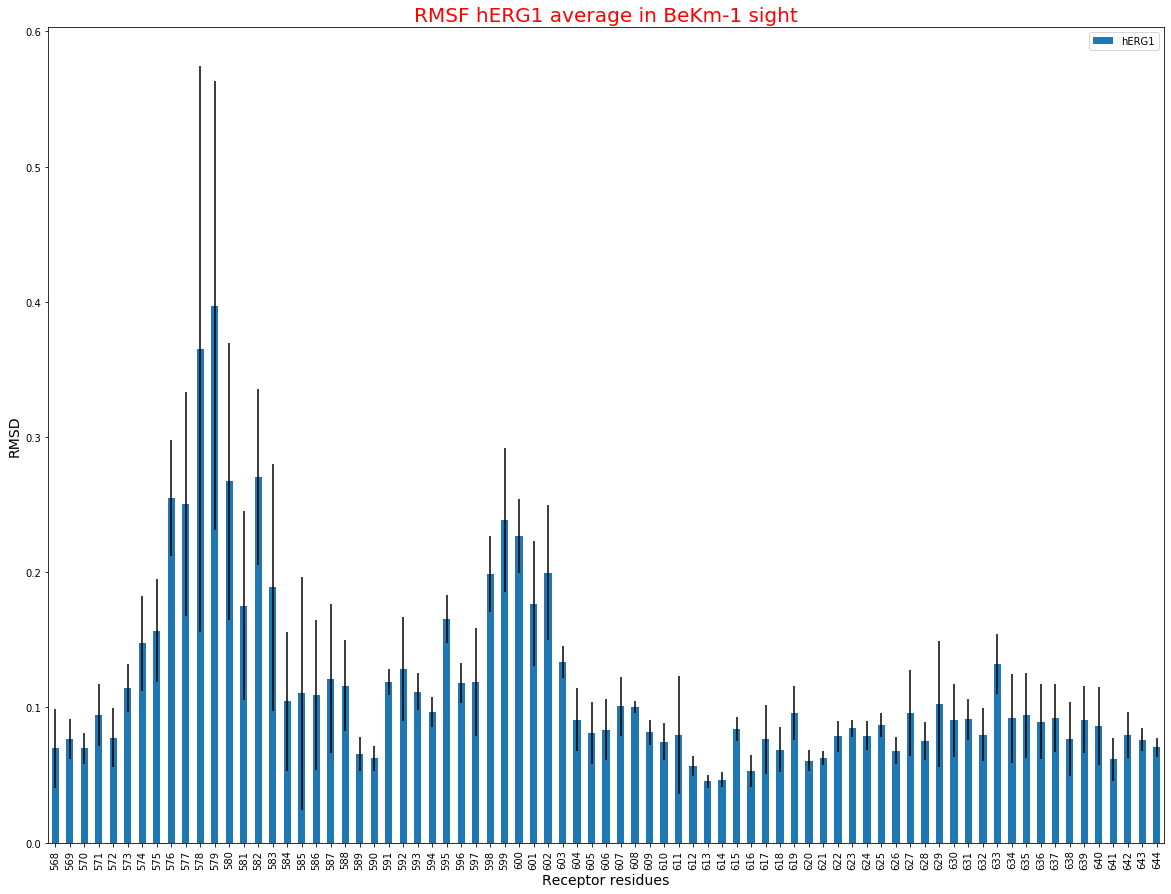

In [19]:
plot_receptor_RMSF("hERG1")

<Figure size 864x648 with 0 Axes>

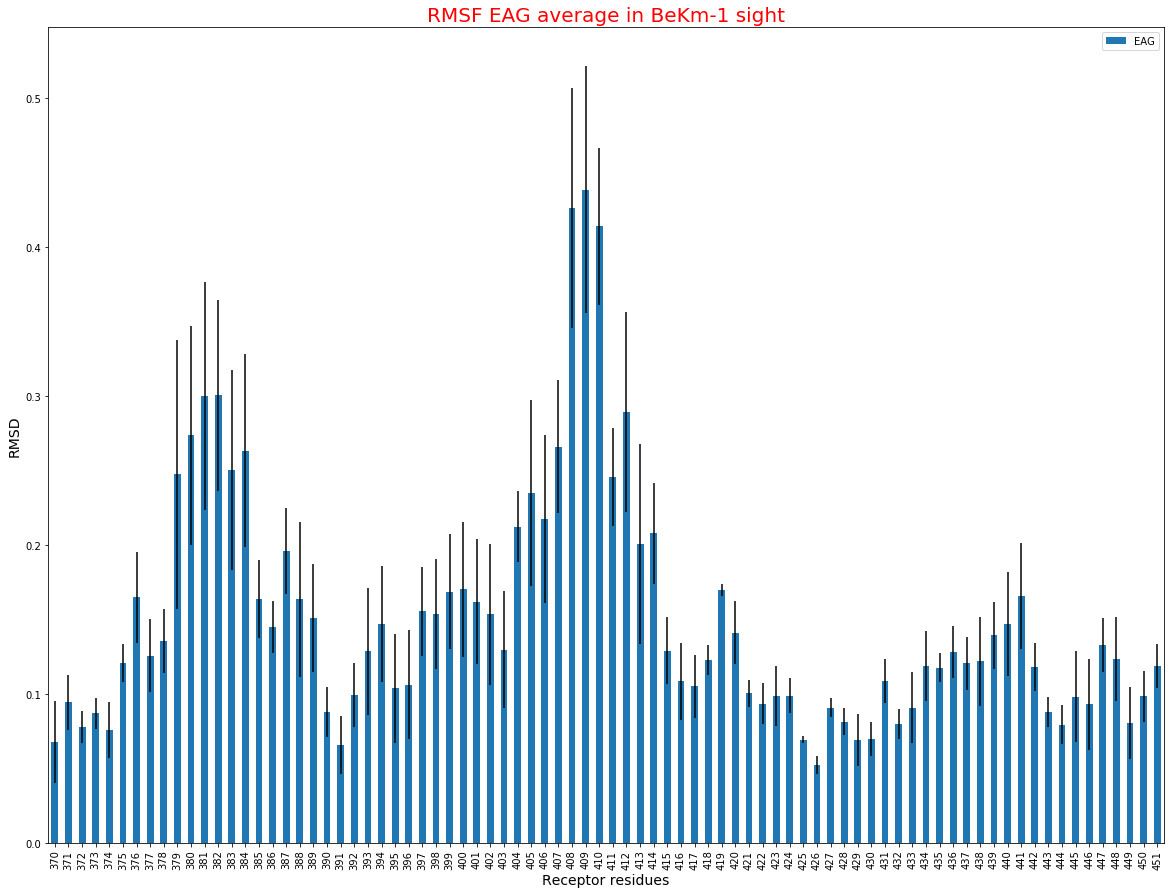

In [20]:
plot_receptor_RMSF("EAG")